# Luchtvervuiling

Studenten: Wietske Boersma, Isa van den Hoven, Alecsandru Kreefft-Libiu, Timber Rijsdorp

Teamnummer: N5

In [1]:
# Load image from link
url = 'https://cdn.nos.nl/image/2022/06/21/871362/1536x864a.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© NOS"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© NOS


## Introduction

Longkanker is één van de meest voorkomende vormen van kanker. Diverse onderzoeken naar de oorzaken van longkanker hebben risicofactoren gevonden, waaronder luchtvervuiling. Steden en industriële gebieden met hoge niveaus van uitstoot van diverse stoffen, zoals stikstofoxide en zwaveldioxide, hebben verhoogde risico's. Deze verontreinigende stoffen kunnen diep doordringen in de longen en chronische ontstekingen veroorzaken, wat kan leiden tot de ontwikkeling van kanker.
In dit overzicht worden diverse visualisaties gepresenteerd die inzicht bieden in de relatie tussen luchtvervuiling en longkanker. Er wordt vanuit twee perspectieven naar de kwestie gekeken. Het eerste perspectief benadrukt dat luchtvervuiling verminderd moet worden omdat het een toename van longkankerdiagnoses veroorzaakt. Het tweede perspectief maakt een vergelijking met de impact van roken op de diagnose van longkanker. In de visualisaties wordt verwezen naar de TBL-rate, waarmee Tracheaal, Bronchitis en Longkanker worden aangeduid.
 

## Dataset and Preprocessing

Voor dit onderzoek hebben we 3 datasets gebruikt. Namelijk een dataset met de hoeveelheid doden voor longkanker, een dataset met de specifieke uistoten in luchtvervuiling, een dataset met de dagelijkse rokers per land. Voor de dataset met uitstoten hebben we nog een 4e dataset gebruikt om het om te rekenen van totale uitstoot naar uitstoot per capita. De gedetaileerde beschrijving van de datasets en hoe we het hebben gefilterd voor gebruik kan je zien in het hoofdstuk: [Data Preprocessing](https://timber4.github.io/InformationVisualisationProject/docs/preprocessing.html). 

## Perspectief 1: Luchtvervuiling moet direct verminderd worden voor de bescherming van de gezondheid

Luchtvervuiling is een factor in de hoeveelheid mensen die longkanker krijgen.

### Argument: Luchtvervuiling veroorzaakt longkanker

Luchtvervuilende stoffen zoals stikstof-oxide kan longkanker veroorzaken bij mensen die dicht in de buurt van deze vervuilende stoffen wonen.

In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

country_codes = ['NLD', 'ALB', 'USA']

df = pd.read_csv('datasets/norm.csv')
df_2012 = df[df['Year'] == 2012]
df_2012_countries = df_2012[df_2012['Code'].isin(country_codes)]

countries = ['Albanië', 'Nederland', 'Verenigde Staten']

trace = [
    go.Bar(
        x = countries,
        y = df_2012_countries['Nitrogen oxide (NOx)'],
        name = 'NOx per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Sulphur dioxide (SO₂) emissions'],
        name = 'SO2 per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Carbon monoxide (CO) emissions'],
        name = 'CO per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Organic carbon (OC) emissions'],
        name = 'OC per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Non-methane volatile organic compounds (NMVOC) emissions'],
        name = 'NMVOC per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Black carbon (BC) emissions'],
        name = 'BC per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Ammonia (NH₃) emissions'],
        name = 'NH3 per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['TBL rate'],
        name = 'Longkanker-doden leeftijd gestandardiseerd'
    )]    
fig = go.Figure(trace)
fig.update_layout(barmode='group', title='Uitstoten en longkanker-doden voor China, Nederland en de Verenigde Staten')
fig.show()

> *Figure 1: Staafdiagram die de uitstoot van verschillende schadelijke stoffen laat zien en de hoeveelheid mensen die overleden zijn aan kanker.*

We zien in het figuur hierboven de uitstoten voor drie landen per 1000 inwoners. We zien dat Nederland en de Verenigde Staten een hogere waarde heeft voor een deel van de luchtvervuilende stoffen dan Albanië. We zien ook dat de hoeveelheid mensen die overlijden aan longkanker in deze twee landen ook hoger is. Dit laat een mogelijke relatie zien tussen luchtvervuilende stoffen en longkanker.

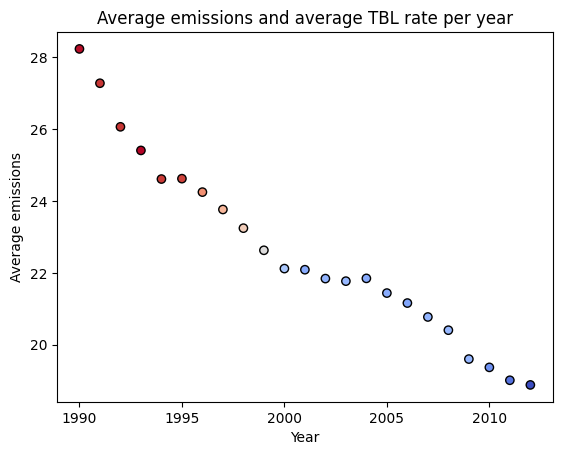

In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/norm.csv')


df['gem uitstoot 2'] = df[['Nitrogen oxide (NOx)','Sulphur dioxide (SO₂) emissions','Carbon monoxide (CO) emissions','Organic carbon (OC) emissions','Non-methane volatile organic compounds (NMVOC) emissions','Black carbon (BC) emissions','Ammonia (NH₃) emissions']].mean(axis=1)


gem_uitstoot_per_jaar = df.groupby('Year')['gem uitstoot 2'].mean().reset_index()
gem_TBL = df.groupby('Year')['TBL rate'].mean().reset_index()
gem_smokers = df.groupby('Year')['Percentage daily smokers'].mean().reset_index()


merged_df = gem_uitstoot_per_jaar.merge(gem_TBL, on='Year').merge(gem_smokers, on='Year')


y = merged_df['Percentage daily smokers']
x = merged_df['Year']
z = merged_df['TBL rate']


colors1 = z/max(z)




y2 = merged_df['gem uitstoot 2']
x2 = merged_df['Year']
z2 = merged_df['TBL rate']


colors =  z2 / max(z2)


plt.scatter(x2,y2, c=colors, cmap='coolwarm', edgecolors='black')
plt.title('Average emissions and average TBL rate per year')
plt.xlabel('Year')
plt.ylabel('Average emissions')
plt.show()

> *Figure 2: De gemiddelde uitstoot per jaar, de kleur van elk punt correspondeert met de hoeveelheid longkanker-doden (blauw:laag-rood:hoog).*

Bovenstaande grafiek geeft de wereldwijde emissie uitstoot over de jaren 1990 tot 2012 weer. De waarde van de wereldwijde emissie-uitstoot is bepaald door een gemiddelde van de emissie-uitstoten van 183 landen. De TBL rate is een schaal die de mate van gediagnosticeerde longkanker weergeeft. Voor deze waarde is tevens het gemiddelde genomen van de 183 betreffende landen. De sterkte van de TBL rate wordt in de grafiek aan de hand van een kleur aangeduid. Hoe warmer de kleur, hoe hoger de TBL rate en hoe koeler de kleur, hoe lager de rate. 
De afnemende trend in de grafiek laat een daling in wereldwijde uitstoot zien door de jaren heen. Tevens is er een verandering in kleur te zien naarmate de jaren vorderen. Deze verandering duidt op een afname in TBL rate. Deze grafiek toont een correlatie tussen de wereldwijde emissie-uitstoot en de hoeveelheid gediagnosticeerde kanker. Deze correlatie suggereert een verband tussen lonkanker en uitstoot. Wel bevat de grafiek door het groeperen van data nog maar 22 datapunten. Er is niet met zekerheid te zeggen of de correlatie een daadwerkelijk verband aantoont.
 

## Perspectief 2: Het verminderen van luchtvervuiling heeft geen prioriteit, omdat het geen grote impact heeft op de gezondheid.

* Andere oorzaken van longkanker zijn erger
* Luchtvervuiling neemt al af

### Argument: Roken is een grotere factor in het krijgen van longkanker

Hoewel er een correlatie bestaat tussen luchtvervuiling en longkanker, is de correlatie tussen roken en longkanker veel erger.

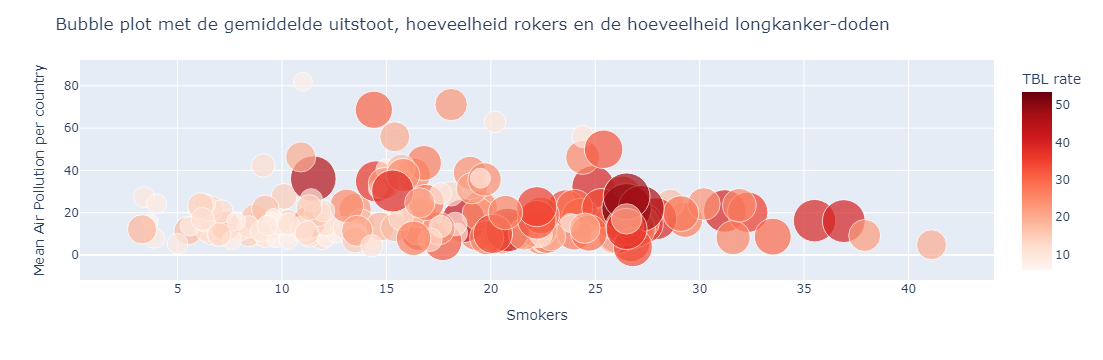

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
pd.options.mode.chained_assignment = None  # //TODO:Voor nu oplossing, later verwijderen

df = pd.read_csv('datasets/norm.csv')
df_2012 = df[df['Year'] == 2012]
df_2012['Mean Air Pollution'] = df_2012[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions']].mean(axis=1)


df_2012['Mean Air Pollution'] = df_2012['Mean Air Pollution']
df_2012['Percentage daily smokers'] = df_2012['Percentage daily smokers']

pearsons_r = df_2012['Mean Air Pollution'].corr(df_2012['Percentage daily smokers'])


fig = px.scatter(df_2012, x='Percentage daily smokers', y='Mean Air Pollution', size='TBL rate', hover_name='Code', color='TBL rate', size_max=35, color_continuous_scale='Reds')


# Customize layout and tooltip text
fig.update_layout(
   title='Bubble plot met de gemiddelde uitstoot, hoeveelheid rokers en de hoeveelheid longkanker-doden',
   xaxis_title=' Smokers',
   yaxis_title='Mean Air Pollution per country',
)


# Set text format for tooltips
fig.update_traces(textposition='top center')


# Show plot
fig.show()


> *Figure 3: Bubble plot met de gemiddelde uitstoot en de hoeveelheid rokers, de grote van elk punt geeft de hoeveelheid longkanker-doden aan.*

In deze bubble chart worden de mate van luchtvervuiling en het percentage van dagelijkse rokers tegen elkaar afgezet. Elke bubbel geeft een land in een jaar weer, de grootte en de kleur van de bubbels geven inzicht in de bijbehorende TBL-rate. Hoe donkerder en groter de bubbel des te hoger de TBL-rate. Uit de chart kan worden opgemaakt dat het verband tussen roken en de TBL-rate aanzienlijk sterker is, dan het verband tussen mate van vervuiling en de TBL-rate.

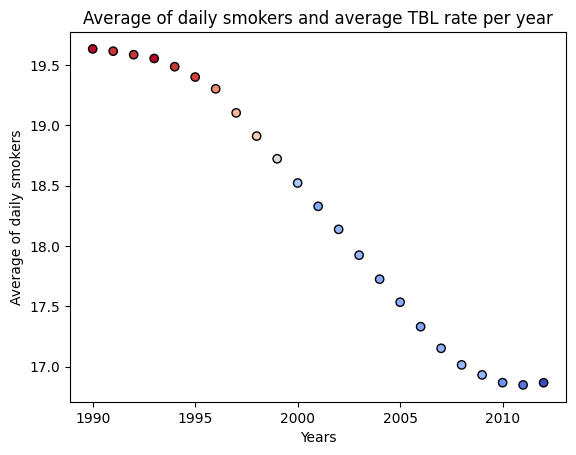

In [6]:
df = pd.read_csv('datasets/norm.csv')


df['gem uitstoot 2'] = df[['Nitrogen oxide (NOx)','Sulphur dioxide (SO₂) emissions','Carbon monoxide (CO) emissions','Organic carbon (OC) emissions','Non-methane volatile organic compounds (NMVOC) emissions','Black carbon (BC) emissions','Ammonia (NH₃) emissions']].mean(axis=1)


gem_uitstoot_per_jaar = df.groupby('Year')['gem uitstoot 2'].mean().reset_index()
gem_TBL = df.groupby('Year')['TBL rate'].mean().reset_index()
gem_smokers = df.groupby('Year')['Percentage daily smokers'].mean().reset_index()


merged_df = gem_uitstoot_per_jaar.merge(gem_TBL, on='Year').merge(gem_smokers, on='Year')


y = merged_df['Percentage daily smokers']
x = merged_df['Year']
z = merged_df['TBL rate']


colors1 = z/max(z)

plt.scatter(x,y, c=colors1, cmap='coolwarm',edgecolors='black')
plt.title('Average of daily smokers and average TBL rate per year')
plt.xlabel('Years')
plt.ylabel('Average of daily smokers')
plt.show()

> *Figure 4: De gemiddelde percentage dagelijkse rokers, de kleur van elk punt correspondeert met de hoeveelheid longkanker-doden (blauw:laag-rood:hoog).*

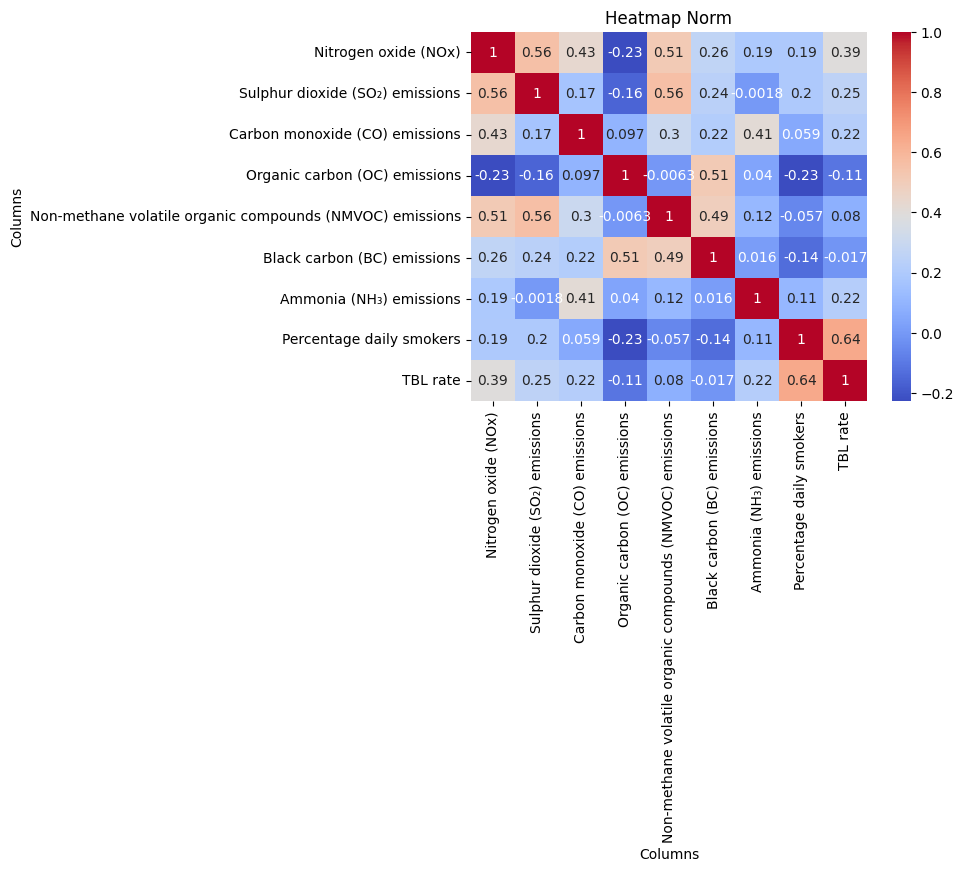

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


norm = pd.read_csv('datasets/norm.csv')


corr2 = norm.corr(numeric_only=True)
corr_trimmed2 = corr2.iloc[2:, 2:]


sns.heatmap(corr_trimmed2, annot=True, cmap='coolwarm')
plt.title('Heatmap Norm')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()



> *Figure 5: Heatmap van de Pearson's R tussen elk variabel.*

### Argument: Luchtvervuiling neemt al af.

Luchtvervuiling is al aan het krimpen, snellere vermindering is niet nodig.

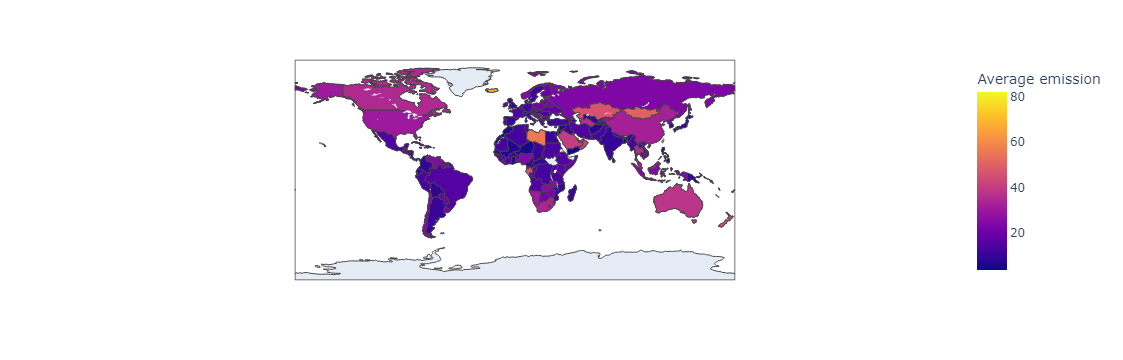

In [7]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

df = pd.read_csv('datasets/norm.csv')
df_2012 = df[df['Year'] == 2012]
df_avg_emission = df_2012.copy()
df_avg_emission['Average emission'] = df_avg_emission[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
                                                       'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Black carbon (BC) emissions',
                                                       'Ammonia (NH₃) emissions']].mean(axis=1)
df_avg_emission = df_avg_emission.rename(columns={'Code':'locations'})

fig = px.choropleth(df_avg_emission,
                           locations="locations",
                           color="Average emission",
                           range_color=(df_avg_emission['Average emission'].min(), df_avg_emission['Average emission'].max()))
fig.show()

> *Figure 6: Kaart met de gemiddelde uitstoot van luchtvervuilende stoffen*

## Reflection

//TODO: Reflection

## Work Distribution

//TODO: Work Distribution

## References

//TODO: References